# Loan Approval Prediction

### Project is a Part of Hackathon by [Analytics Vidhya](https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/).

### Evaluation Metric is Accuracy.

### [Data Sets](https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#ProblemStatement) : Train and Test Files from Analytics Vidhya Hackathon.

### Data 

<table><tr><td><img height="480" width="640" src="Loan Approval.png"></td></tr></table>

### Important Features for Loan Approval Prediction 

1. **Education : High Level of Education - High Chance of Loan Approval**

2. **Income of Applicant : High Income - High Chance of Loan Approval**

3. **Loan Amount : Low Loan Amount - High Chance of Loan Approval**

4. **Loan Term : Short Loan Term - High Chance of Loan Approval**

5. **Credit History : Good Credit Score - High Chance of Loan Approval**
***
### Flow of Project :

1. **[Exploratory Data Analysis](#EDA)**

2. **[Data Visualization](#DV)**

3. **[Data Preprocessing](#DP)**

4. **[Data Modelling and Evaluation](#DME)**

5. **[Conclusion](#CON)**

***
**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Import Data Set**

In [2]:
Train = pd.read_csv("Loan Approval Train.csv")

Test = pd.read_csv("Loan Approval Test.csv")

# <a name="EDA">Exploratory Data Analysis</a>

***

**Train Data Set**

In [3]:
Train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Test Data Set**

In [4]:
Test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


**Information of Train Data Set**

In [5]:
print(Train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


**Information Gained:** 

1. Train Data Set consists of 614 Rows and 13 Columns.
2. Train Data Set consist of Missing Data.
3. Data Types of Each Column in Train Data Set.
4. Loan Status is the Traget Variable.
***
**Information of Test Data Set**

In [6]:
print(Test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
None


**Information Gained :**

1. Test Data Set consists of 367 Rows and 12 Columns.
2. Target Variable is Absent in Test Data Set.
3. Test Data Set consist of Missing Data.
4. Data Types of Each Column in the Test Data Set.

**Train Data Set and Test Data Set Ratio**

In [7]:
print(f"Train Data Set : {len(Train) / (len(Train) + len(Test))*100:.2f}%")
print()
print(f"Train Data Set : {len(Test) / (len(Train) + len(Test))*100:.2f}%")

Train Data Set : 62.59%

Train Data Set : 37.41%


**Variables of Object Data Type**

In [8]:
Train.select_dtypes("object").head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


**Variables of Numerical Data Type ( Integers and Floating Point Numbers )** 

In [9]:
Train.select_dtypes('number').head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


# <a name="DV">Data Visualization</a> 

### Univariate Analysis 

**Aanlyze Each Variable Individually.**

### Target Variable :

**Target Variable is Categorical.**

**We Can Observe the Difference in Categorical Values using Bar Plot which Represents Frequency.**

In [10]:
print(Train["Loan_Status"].value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64


**Proportion of Frequency**

In [11]:
print(f"{round(Train['Loan_Status'].value_counts(normalize = True,)*100,2)}")

Y    68.73
N    31.27
Name: Loan_Status, dtype: float64


### Independent Variables   

**Gender**

In [12]:
print(Train["Gender"].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64


**Marrital Status**

In [13]:
print(Train["Married"].value_counts())

Yes    398
No     213
Name: Married, dtype: int64


**Education**

In [14]:
print(Train["Education"].value_counts())

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


**Self Employed**

In [15]:
print(Train["Self_Employed"].value_counts())

No     500
Yes     82
Name: Self_Employed, dtype: int64


**Credit History**

In [16]:
print(Train["Credit_History"].value_counts())

1.0    475
0.0     89
Name: Credit_History, dtype: int64


**Visualizing Categorical Features.**

**Bar Plot is Best for Categorical Data**

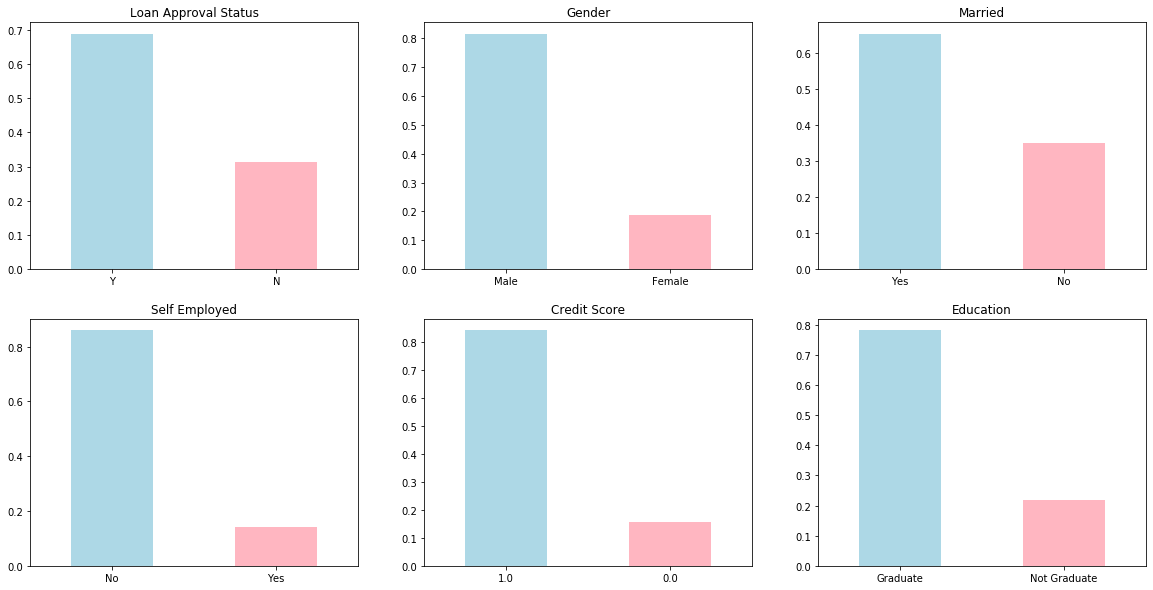

In [17]:
plt.figure(1)

Color = ["lightblue", "lightpink"]

plt.subplot(231)
Train['Loan_Status'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Loan Approval Status', color = Color)
plt.xticks(rotation = 0)

plt.subplot(232)
Train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender', color = Color)
plt.xticks(rotation = 0)

plt.subplot(233)
Train['Married'].value_counts(normalize=True).plot.bar(title= 'Married', color = Color)
plt.xticks(rotation = 0)

plt.subplot(234)
Train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self Employed', color = Color)
plt.xticks(rotation = 0)

plt.subplot(235)
Train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit Score', color = Color)
plt.xticks(rotation = 0)

plt.subplot(236)
Train['Education'].value_counts(normalize=True).plot.bar(title= 'Education', color = Color)
plt.xticks(rotation = 0)

plt.show()

**Conclusions :**
1. Arround 69% or Applicants get Approvals for Loan.
2. More than 80% Applicants are Male.
3. Almost 65% Applicants are Married.
4. More than 15% Applicants are Self Employed.
5. More than 80% Applicants have a Good Credit Score.
6. Almost 80% Applicants are Graduate.
***
**Ordinal Data**

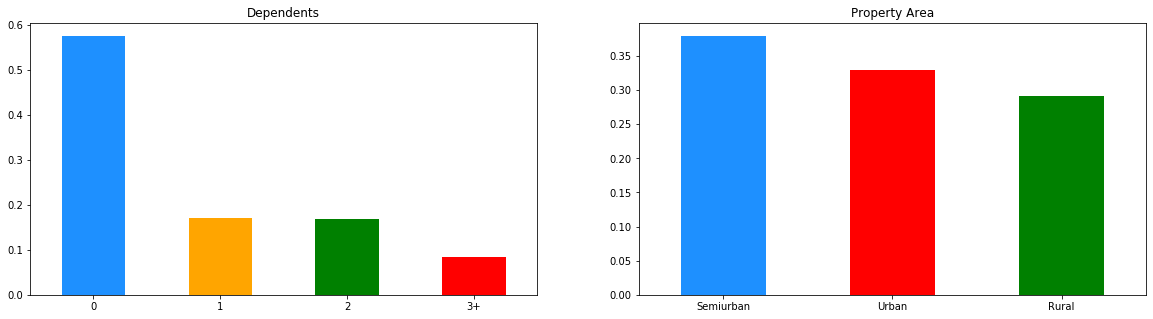

In [18]:
plt.figure(1)
plt.subplot(121)

Color1 = ["dodgerblue", "orange", "green", "red"]

Color2 = ["dodgerblue", "red", "green"]

Train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,5), title= 'Dependents', color = Color1)
plt.xticks(rotation = 0)

plt.subplot(122)
Train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property Area', color = Color2)
plt.xticks(rotation = 0)

plt.show()

**Conclusions :**

1. Maximum Number of the Applicants don't have Dependents.
2. Mostly Applicants are from Semi Urban and Urban.

### Independent Variables (Numerical)

**Applicant Income Distribution**

Measures of Central Tendency : 
Mean of Applicant Income : 5403.46
Median of Applicant Income : 3812.50

Measure of Variability :
Standard Deviation of Applicant Income : 6109.04

Kurtosis of Applicant Income : 60.54


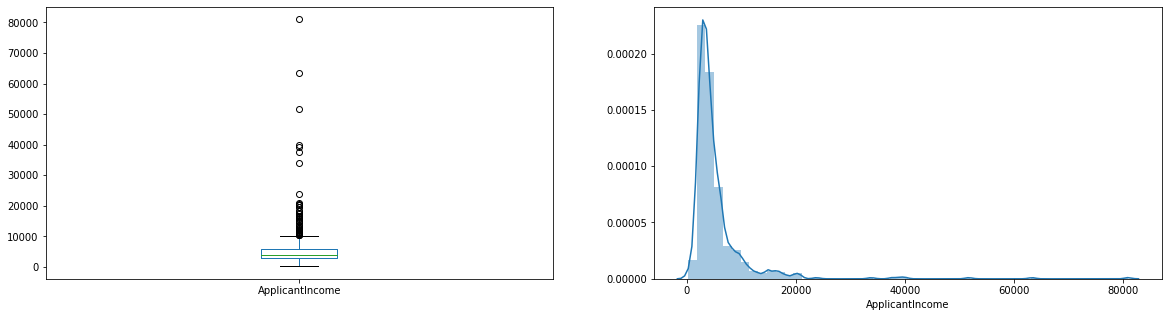

In [19]:
plt.figure(1)

plt.subplot(121)
Train["ApplicantIncome"].plot.box(figsize = (20,5))

plt.subplot(122)
sns.distplot(Train["ApplicantIncome"]);

print(f"Measures of Central Tendency : ")
print(f"Mean of Applicant Income : {Train['ApplicantIncome'].mean():.2f}")
print(f"Median of Applicant Income : {Train['ApplicantIncome'].median():.2f}")

print()

print(f"Measure of Variability :")
print(f"Standard Deviation of Applicant Income : {Train['ApplicantIncome'].std():.2f}")

print()

print(f"Kurtosis of Applicant Income : {Train['ApplicantIncome'].kurtosis():.2f}")

**Distribution of Data is more Towards Left, Distribution is Right Skewed. (Positive Skewness)**

**Algorithm Works Better if the Data is Normally Distributed.**

**Data is Heavily Tailed : Histogram and Kernel Density Plot is Best Way to Represent Kurtosis.**

**The Boxplots Represents the Presence of Outliers Values, Data contains many Outliers.**

**For Better Observation**

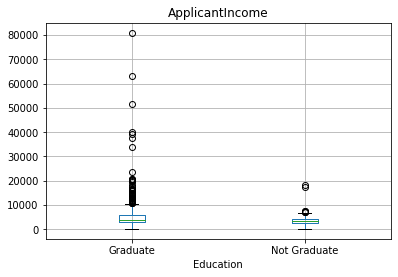

In [20]:
Train.boxplot(column = 'ApplicantIncome', by = 'Education')
plt.suptitle("");

**Graduates have High Income**
***
**Coapplicant Income Distribution**

Measures of Central Tendency : 
Mean of Coapplicant Income : 1621.25
Median of Coapplicant Income : 1188.50

Measure of Variability :
Standard Deviation of Coapplicant Income : 2926.25

Kurtosis of Coapplicant Income : 84.96


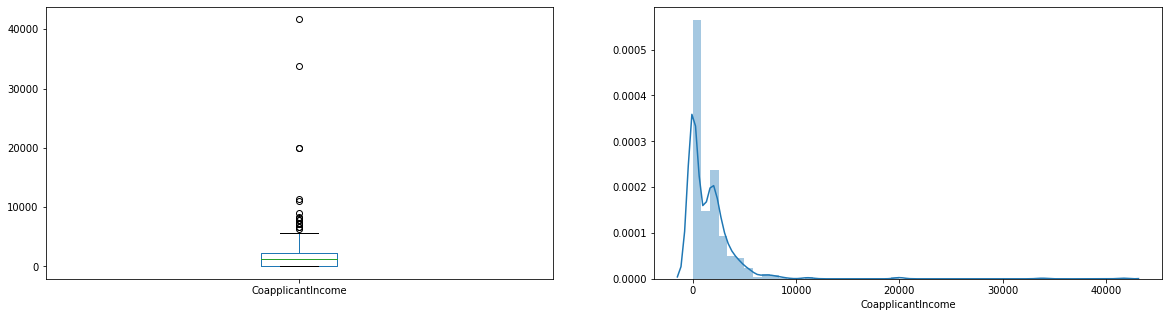

In [21]:
plt.figure(1)

plt.subplot(121)
Train["CoapplicantIncome"].plot.box(figsize = (20,5))

plt.subplot(122)
sns.distplot(Train["CoapplicantIncome"]);

print(f"Measures of Central Tendency : ")
print(f"Mean of Coapplicant Income : {Train['CoapplicantIncome'].mean():.2f}")
print(f"Median of Coapplicant Income : {Train['CoapplicantIncome'].median():.2f}")

print()

print(f"Measure of Variability :")
print(f"Standard Deviation of Coapplicant Income : {Train['CoapplicantIncome'].std():.2f}")

print()

print(f"Kurtosis of Coapplicant Income : {Train['CoapplicantIncome'].kurtosis():.2f}")

**Coapplicant Income is Right Skewed and consist lots of Outliers.**
***
**Loan Amount**

Measures of Central Tendency : 
Mean of Loan Amount : 146.41
Median of Loan Amount : 128.00

Measure of Variability :
Standard Deviation of Loan Amount : 85.59

Kurtosis of Loan Amount : 10.40


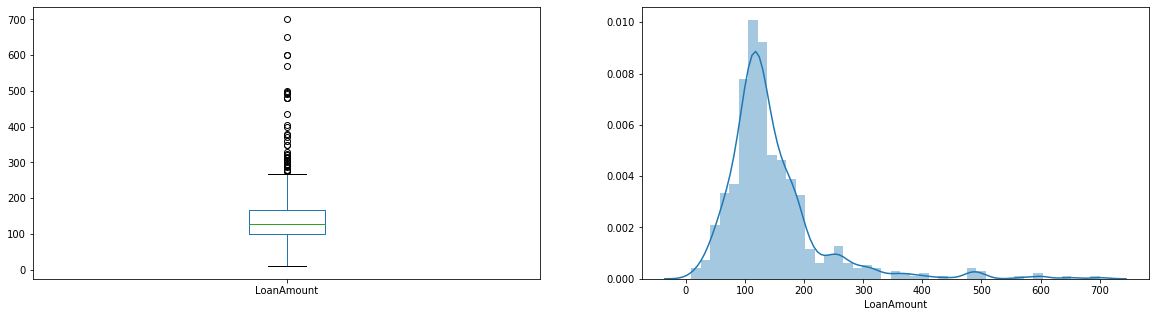

In [22]:
plt.figure(1)

plt.subplot(121)
Train["LoanAmount"].plot.box(figsize = (20,5))

plt.subplot(122)
sns.distplot(Train["LoanAmount"]);

print(f"Measures of Central Tendency : ")
print(f"Mean of Loan Amount : {Train['LoanAmount'].mean():.2f}")
print(f"Median of Loan Amount : {Train['LoanAmount'].median():.2f}")

print()

print(f"Measure of Variability :")
print(f"Standard Deviation of Loan Amount : {Train['LoanAmount'].std():.2f}")

print()

print(f"Kurtosis of Loan Amount : {Train['LoanAmount'].kurtosis():.2f}")

**Loan Amount Term**

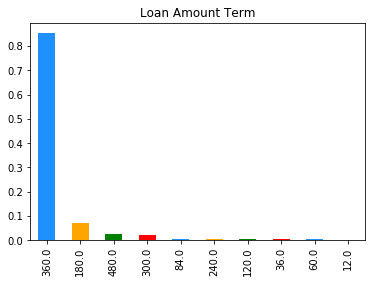

In [23]:
Train["Loan_Amount_Term"].value_counts(normalize = True).plot.bar(title = "Loan Amount Term", color = Color1);

**Around 85% of Loans are of 360 Months (30 Years)**

### Bivariate Analysis

**Categorical Independent Variable vs Target Variable**

In [24]:
print(pd.crosstab(Train["Gender"], Train["Loan_Status"], colnames=['Loan Status'], dropna = True))

Loan Status    N    Y
Gender               
Female        37   75
Male         150  339


**Stacked Bar Plot**

**Proportion of Loan Approved or not Approved based on Gender.**

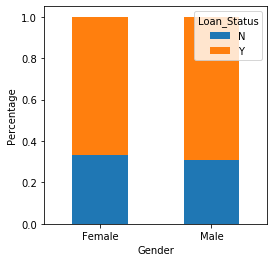

In [25]:
Gender = pd.crosstab(Train['Gender'], Train['Loan_Status'])
Gender.div(Gender.sum(axis = 1).astype(float), axis = 0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation = 0);

In [26]:
print(pd.crosstab(Train['Married'], Train['Loan_Status'], colnames = ['Loan Status'], dropna = True))

Loan Status    N    Y
Married              
No            79  134
Yes          113  285


**Proportion of Loan Approved or not based on Marital Status.**

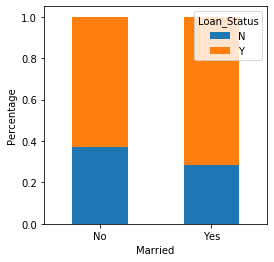

In [27]:
Married = pd.crosstab(Train["Married"],Train["Loan_Status"])
Married.div(Married.sum(axis = "columns").astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (4,4))
plt.xlabel("Married")
plt.ylabel("Percentage")
plt.xticks(rotation = 0);

In [28]:
print(pd.crosstab(Train['Dependents'], Train['Loan_Status'], colnames = ['Loan Status'], dropna = True))

Loan Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


**Proportion of Loan Approved or not Approved based on Dependents.**

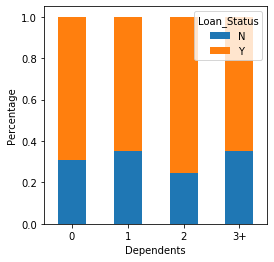

In [29]:
Dependents = pd.crosstab(Train['Dependents'], Train['Loan_Status'])
Dependents.div(Dependents.sum(axis = "columns").astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (4,4))
plt.xlabel('Dependents')
plt.ylabel('Percentage')
plt.xticks(rotation = 0);

In [30]:
print(pd.crosstab(Train['Education'], Train['Loan_Status'], colnames = ['Loan Status'], dropna = True))

Loan Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


**Loan Approved or not Approved based on Education.**

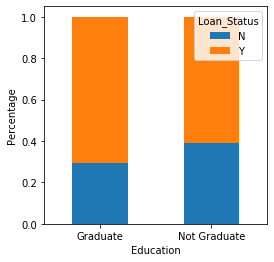

In [31]:
Education = pd.crosstab(Train['Education'], Train['Loan_Status'])
Education.div(Education.sum(axis = 'columns').astype(float), axis = 'rows').plot(kind = 'bar', stacked = True, figsize = (4,4))
plt.xlabel('Education')
plt.ylabel('Percentage')
plt.xticks(rotation = 0);

In [32]:
print(pd.crosstab(Train['Self_Employed'], Train['Loan_Status'], colnames = ['Loan Status'], rownames = ['Self Employed'], dropna = True))

Loan Status      N    Y
Self Employed          
No             157  343
Yes             26   56


**Loan Approval based on Self Employed**

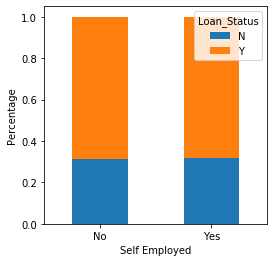

In [33]:
SelfEmployed = pd.crosstab(Train['Self_Employed'], Train['Loan_Status'])
SelfEmployed.div(SelfEmployed.sum(axis = 'columns').astype(float), axis = 'rows').plot(kind = 'bar', stacked = True, figsize = (4,4))
plt.xlabel('Self Employed')
plt.ylabel('Percentage')
plt.xticks(rotation = 0);

In [34]:
print(pd.crosstab(Train['Credit_History'], Train['Loan_Status'], rownames = ['Credit History'], colnames = ['Loan Status']))

Loan Status      N    Y
Credit History         
0.0             82    7
1.0             97  378


**Loan Approved or not Approved based on Credit Score**

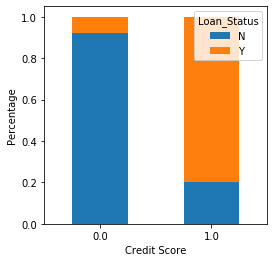

In [35]:
Credit = pd.crosstab(Train['Credit_History'], Train['Loan_Status'])
Credit.div(Credit.sum(axis = 'columns').astype(float), axis = 'rows').plot(kind = 'bar', stacked = True, figsize = (4,4))
plt.xlabel('Credit Score')
plt.ylabel('Percentage')
plt.xticks(rotation = 0);

In [36]:
print(pd.crosstab(Train['Property_Area'], Train['Loan_Status'], colnames = ['Loan Status'], rownames = ['Property Area']))

Loan Status     N    Y
Property Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


**Loan Approved or not Approved based on Property Area**

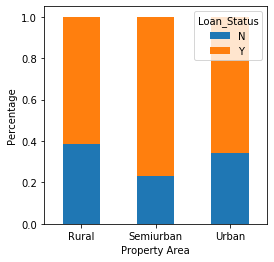

In [37]:
Area  = pd.crosstab(Train['Property_Area'], Train['Loan_Status'])
Area.div(Area.sum(axis = 'columns').astype(float), axis = 'rows').plot(kind = 'bar', stacked = True, figsize = (4,4))
plt.xlabel('Property Area')
plt.ylabel('Percentage')
plt.xticks(rotation = 0);

**Correlation between Features.**

In [38]:
Train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


**Correlation Heat Map for Better understanding of Correlations.**

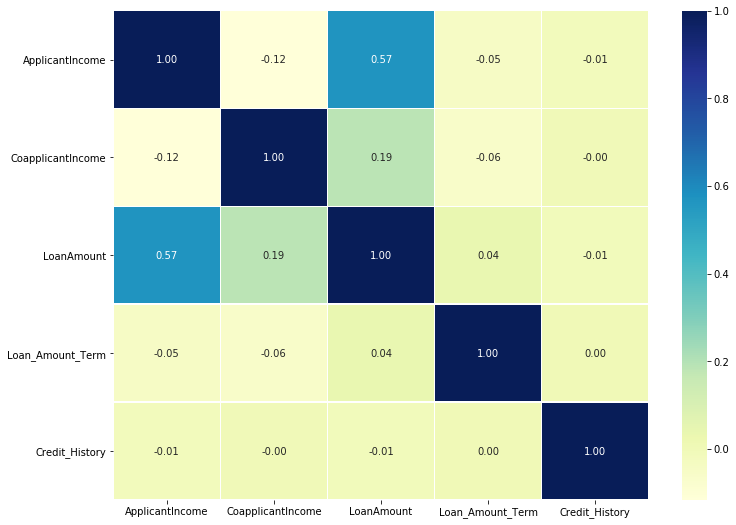

In [39]:
Fig, Axes = plt.subplots(figsize = (12,9))
Axes = sns.heatmap(Train.corr(), annot = True, linewidths = 0.5, fmt = '.2f', cmap = 'YlGnBu');

# Adjusting the Broken Map :
#Bottom, Top = Axes.get_ylim() 
#Axes.set_ylim(Bottom + 0.5, Top - 0.5);

In [40]:
print(Train['Loan_Status'].value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64


**Replacing Y and N to 1 and 0**

In [41]:
Train['Loan_Status'] = np.where(Train['Loan_Status'] == 'Y',1,0)

print(Train['Loan_Status'].value_counts())

1    422
0    192
Name: Loan_Status, dtype: int64


**Heat Map for Checking Correlation after Including the Target Variable**

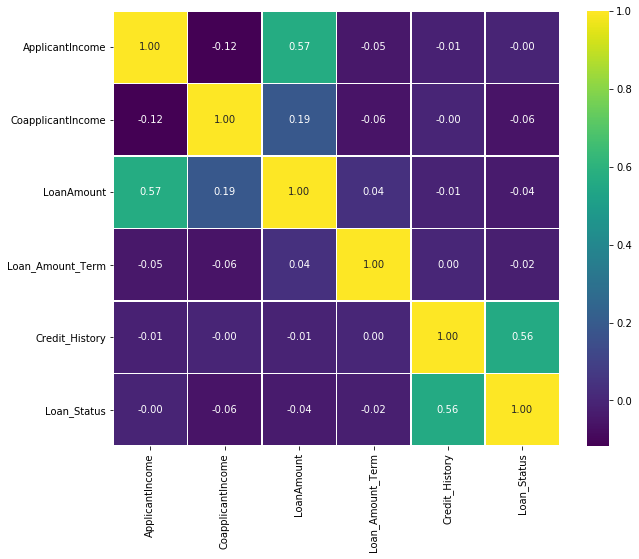

In [42]:
Fig, Axes = plt.subplots(figsize = (10,8))
Axes = sns.heatmap(Train.corr(), annot = True, linewidths = 0.5, fmt = '.2f', cmap = 'viridis');

**Better Correlations :**
1. **Applicant Income and Loan Amount.**
2. **Credit History and Loan Status.**

# <a name="DP">Data Preprocessing</a>

**A Data Minig Technique**

**Transforming Raw Data into Proper Format that can be Accepted for Creating Machine Learning Models.**

**Real World Data may be Incomplete and Filled with Missing Values, can't be used Directly for Creating Machine Learning Models.**

**Missing Values must be Imputed or Dropped with Corresponding Mean or Median based on what Fits Better.**

### Missing Value in the Data Set

In [43]:
print(Train.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


**While Filling Missing Values :**

1. **Numerical Data : Impute with Mean or Median of Corresponding Column Data.**
2. **Categorical Data : Impute with Mode of Corresponding Column Data.**

In [44]:
Train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


#### Categorical Features : (Gender, Married,Dependents,  Education, Self Employed, Credit Score)

In [45]:
print(f'Gender : \n{Train["Gender"].value_counts()}')
print()
print(f'Marital Status : \n{Train["Married"].value_counts()}')
print()
print(f'Dependents : \n{Train["Dependents"].value_counts()}')
print()
print(f'Education : \n{Train["Education"].value_counts()}')
print()
print(f'Self Employed : \n{Train["Self_Employed"].value_counts()}')
print()
print(f'Credit Score : \n{Train["Credit_History"].value_counts()}')

Gender : 
Male      489
Female    112
Name: Gender, dtype: int64

Marital Status : 
Yes    398
No     213
Name: Married, dtype: int64

Dependents : 
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Education : 
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Self Employed : 
No     500
Yes     82
Name: Self_Employed, dtype: int64

Credit Score : 
1.0    475
0.0     89
Name: Credit_History, dtype: int64


**Impute the Categorical Missing Values with Mode : Most Frequently Repeated Value from the Column.**

**Imputation should be done in both Train and Test Data Set**

In [46]:
Train['Gender'].fillna(Train['Gender'].mode()[0], inplace = True) # Count of Male is More than Female.
Test['Gender'].fillna(Test['Gender'].mode()[0], inplace = True)

Train['Married'].fillna(Train['Married'].mode()[0], inplace = True) # Count of Married is more than Unmarried.
Test['Married'].fillna(Test['Married'].mode()[0], inplace = True)

Train['Dependents'].fillna(Train['Dependents'].mode()[0], inplace = True) # Count of 0 Dependents is the Maximum.
Test['Dependents'].fillna(Test['Dependents'].mode()[0], inplace = True)

Train['Education'].fillna(Train['Education'].mode()[0], inplace = True) # # Count of Graduates is more than Non Graduates.
Test['Education'].fillna(Test['Education'].mode()[0], inplace = True)

Train['Self_Employed'].fillna(Train['Self_Employed'].mode()[0], inplace = True) # Count of Non Self Employed is More.
Test['Self_Employed'].fillna(Test['Self_Employed'].mode()[0], inplace = True)

Train['Credit_History'].fillna(Train['Credit_History'].mode()[0], inplace = True) # Credit Score 1.0 Count is More.
Test['Credit_History'].fillna(Test['Credit_History'].mode()[0], inplace = True)

**Check that Missing Values are Filled or Not :**

In [47]:
print(Train.isnull().sum())

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64


**Replacing 3+ in Dependents to 3**

In [48]:
print(Train['Dependents'].value_counts())

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


In [49]:
Train['Dependents'].replace('3+', 3, inplace = True)
Test['Dependents'].replace('3+', 3, inplace = True)
print(Train['Dependents'].value_counts())

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64


**Now Only Loan Amount and Loan Amount Terms are Remaining.**

In [50]:
print(Train['Loan_Amount_Term'].value_counts())

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


**Here also Count of Loan Amount Terms of 36 Months is More than other Terms.**

**Replacing Missing Values with Mode : 360 Months (30 Years)**

In [51]:
Train['Loan_Amount_Term'].fillna(Train['Loan_Amount_Term'].mode()[0], inplace = True)
Test['Loan_Amount_Term'].fillna(Test['Loan_Amount_Term'].mode()[0], inplace = True)

**Loan Amount is a Numerical Data : Imputing Missing Data Values with the Median of Loan Amounts.**

In [52]:
Train['LoanAmount'].fillna(Train['LoanAmount'].median(), inplace = True)
Test['LoanAmount'].fillna(Test['LoanAmount'].median(), inplace = True)

**Check whether Every Missing Data is Imputed**

In [53]:
print(f"Train Set : \n{Train.isnull().sum()}")
print()
print(f"Test Set : \n{Test.isnull().sum()}")

Train Set : 
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Test Set : 
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


**Every Missing Values are Imputed Successfully in both Train and Test Data Sets.**
***
### Outlier Treatment

**Major Outliers where Observed above in Applicant Income, Coapplicant Income and The Loan Amount.**

**Outliers where Clearly Visible in Histogram  above.**

**Outliers in the Data Set Often Affects the Mean and Standard Deviation by affecting the Distribution of Data.**

**More Data is Present on Left and Long Tail is on Right. (Right Skewed : Positive Skewed)**

**One Way to Remove Skewness is to Perform Log Transformation.**

**Log Transformation does not Affect the Smaller Values but Reduces the Larger Values, so we get Similar to Normal Distribution.**

### Before Log Transformation :

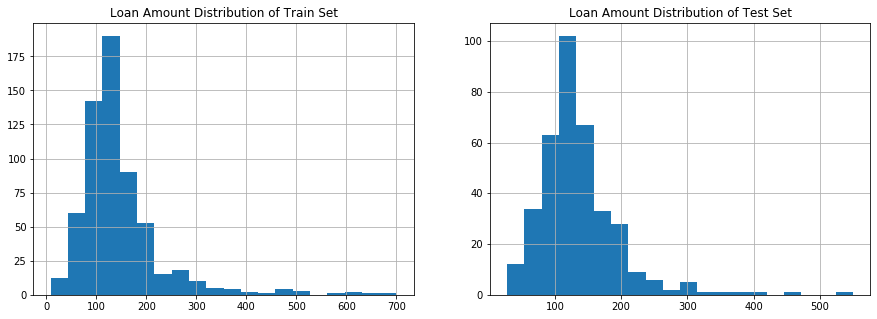

In [54]:
plt.subplot(121)
Train["LoanAmount"].hist(figsize = (15,5), bins = 20)
plt.title('Loan Amount Distribution of Train Set')

plt.subplot(122)
Test['LoanAmount'].hist(bins = 20)
plt.title('Loan Amount Distribution of Test Set');

**Log Transformation of Loan Amount in Train and Test Sets.**

### After Log Transformation :

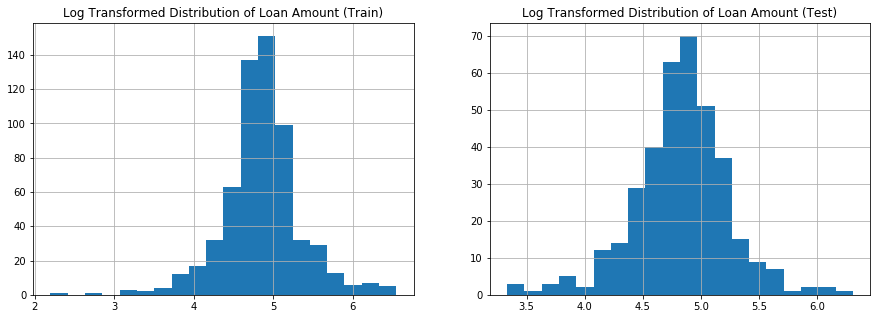

In [55]:
plt.subplot(121)
np.log(Train['LoanAmount']).hist(figsize = (15,5), bins = 20)
plt.title(f'Log Transformed Distribution of Loan Amount (Train)')

plt.subplot(122)
np.log(Test['LoanAmount']).hist(bins = 20)
plt.title(f'Log Transformed Distribution of Loan Amount (Test)');

**Now the Distribution Looks Little Bit Close to the Normal Distribution**

**Larger Values are Normalized.**
***
# <a name="DME">Data Modelling and Evaluation</a>

**Evaluation Metrics for Classification**

1. **Confusion Matrix**

<table><tr><td><img height = 400 width = 400 src="Confusion Matrix.jpg"></td></tr></table>
<table>
    <caption>Confusion Matrix</caption>
    <tr><td>True Positive : </td>
        <td>Actual Value is True (Y) and Prediction is also True (Y)</td>
    </tr>
    <tr><td>True Negative : </td>
        <td>Actual Value is False (N) and Prediction is also False (N)</td>
    </tr>
    <tr><td>False Positive : </td>
        <td>Actual Value is False (N) and Prediction is True (Y)</td>
    </tr>
    <tr><td>False Negative : </td>
        <td>Actual Value is True (Y) and Prediction is False (N)</td>
    </tr>
</table>

**Accuracy : (TP + TN)  /  (TP + TN + FP + FN)**

**Precision : Correctness Achieved in True Prediction (Actually Labelled True Predictions) : TP / (TP + FP)** 

**Recall (Sensitivity) : How many Observations of True Class are Labelled Correctly ? : TP / (TP + FN)**

* **Recall Example :** Proportion of Patients who Actually have COVID19 and Tested Positive.

**Specificity : How many Observations of False Class are Labelled Correctly ? : TN / (TN + FP)**

* **Specificity :** Proportion of Patients without COVID19 and Test Negative.

**Specificity and Sensitivity is Very Important for ROC Curve.**

***

**2.ROC : Receiver Operating Characteristic**

1. **Summarizes Model Performance.**
2. **Higher the Area Under Curve (AUC), Better the Prediction Power of the Model.**
3. **Area Under Curve Measures the Ability of Model to Correctly Classify True Positive's and True Negative's**

<table><caption>Classes of AUC</caption><tr><td><img height="200" weight="200" src="ROC.jpg"></td></tr></table>

**First Model for Classification : Logistic Regression**

**Logistic Regression is a Classification Algorithm : Predicts Binary (0 or 1, Y or N, True or False)**

**Estimation of Logit Function : Sinosuidal (S Shaped Curve) Probability Estimation of 1 or 0**
***
**Loan ID is of No Use so Removing the Loan ID Column from Train and Test Data Set.**

In [56]:
Train.drop('Loan_ID', axis = 'columns', inplace = True)
Test.drop('Loan_ID', axis = 'columns', inplace = True)

In [57]:
Train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


**Scikit Learn is the Rich Set Library Well Equipped with Machine Learning Algorithms :** 

**Library for Creating Machine Learning Models and it's Evaluations.**
***
**Splitting the Data Set into Independent Variables and Target Variable.**

In [58]:
X = Train.drop('Loan_Status', axis = 'columns')
Y = Train['Loan_Status']

**Creating Dummy Variables for Categorical Values.**

**Dummy Variables turns Categorical Variabes into a Series of 0 and 1, making them Easier to Quantify and Compare.**


In [59]:
X = pd.get_dummies(X, drop_first = True)

Train = pd.get_dummies(Train, drop_first = True)

Test = pd.get_dummies(Test, drop_first = True)

In [60]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,0,1,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,1,1,0,1,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,1,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,1,0,0,0,0,0,1


**Splitting the Data into Train and Valid Set**

**Import Librarty for Model Selection**

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_Train, X_Valid, Y_Train, Y_Valid = train_test_split(X, Y, test_size = 0.3, random_state = 0)

**Dimensions of Train Set and Valid Set.**

In [63]:
print(f'70 % of Train Set Dimension : {len(X_Train)} and its Traget Variables Dimension : {len(Y_Train)}')
print(f'30 % of Valid Set Dimension : {len(X_Valid)} and its Target Variables Dimension : {len(Y_Valid)}')

70 % of Train Set Dimension : 429 and its Traget Variables Dimension : 429
30 % of Valid Set Dimension : 185 and its Target Variables Dimension : 185


**Import Logistic Regression Model and Accuracy Score for Evaluation:**

In [64]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

**Instantiate Model Object and Fit the Model to Find Patterns.**

In [65]:
Model = LogisticRegression()

Model.fit(X_Train, Y_Train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Let's Predict Loan Status on Valid Data and Check it's Accuracy Score.**

In [66]:
Y_Prediction = Model.predict(X_Valid)

print(f'Accuracy Score of Logistic Regression Model : {accuracy_score(Y_Valid, Y_Prediction)*100:.2f}%')

Accuracy Score of Logistic Regression Model : 83.24%


**Model has Identified 83% of Loan Status Correctly.**
***
**Import Metric Library for Confusion Matrix :**

In [67]:
from sklearn.metrics import confusion_matrix

**Confusion Matrix :**

In [68]:
ConfusionMatrix = confusion_matrix(Y_Valid, Y_Prediction)

**Visualizing Confusion Matrix as Heat Map for Better Understanding**

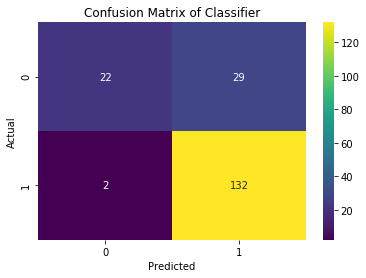

In [69]:
sns.heatmap(ConfusionMatrix, annot = True, fmt = "d", cmap = 'viridis')
plt.title('Confusion Matrix of Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual');

**Import Metric Library for Classification Report**

In [70]:
from sklearn.metrics import classification_report

**3.Classification Report :**

In [71]:
print(f'Classification Report for Classifier : \n{classification_report(Y_Valid, Y_Prediction)}')

Classification Report for Classifier : 
              precision    recall  f1-score   support

           0       0.92      0.43      0.59        51
           1       0.82      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185



**Performance of Our Model is Good : 83% of Accuracy, 82% of Precision and 99% of Recall.**
****
**Prediction for Test Data Set**

In [72]:
Test_Prediction = Model.predict(Test)

**Predictions**

In [73]:
print(Test_Prediction[:25])

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]


**Importing Submission File which we have to Send for Solution Checking.**

In [74]:
Submission = pd.read_csv("Sample Submission.csv")

Loan = pd.read_csv("Loan Approval Test.csv")

**We Want Loan ID Column from Test Data Set**

In [75]:
Submission['Loan_ID'] = Loan['Loan_ID']

Submission['Loan_Status'] = Test_Prediction

In [76]:
print(Submission.head())

    Loan_ID  Loan_Status
0  LP001015            1
1  LP001022            1
2  LP001031            1
3  LP001035            1
4  LP001051            1


**We Need Prediction in Y and N**

In [77]:
Submission['Loan_Status'] = np.where(Submission['Loan_Status'] == 1, "Y", "N")

In [78]:
print(Submission.head())

    Loan_ID Loan_Status
0  LP001015           Y
1  LP001022           Y
2  LP001031           Y
3  LP001035           Y
4  LP001051           Y


**Submit to Check Accuracy on the Leaderboard.**

In [79]:
Submission.to_csv('Logistic.csv', index = False)

**Score for My Submission : 78% of Accuracy**
***
**Using Cross Validation for Better Results**

### Logistic Regression using Stratified K Fold Cross Validation

<table><caption><b>Stratified 5 Fold Cross Validation</b></caption><tr><td><img height = 600 width = 600 src = "Cross Validation.png"></td></tr></table>

**Stratification : The Process of Rearranging the Data so that Each Data Group forms a Good Proportion of Whole Data Set.**

**For Example : In a Binary Classification Problem, Each Class Comprises of 50% of Data : 50% for Y and 50% for No.**

**It Even Deals with Bias and Variance.**

***

**Import Stratified K Fold :**

In [80]:
from sklearn.model_selection import StratifiedKFold

**A Cross Vaidation Logistic Model with Stratified 5 Folds**

**Each Fold will Contain Equal Proportion of Data.**

**Shuffle the Data before Splitting.**

In [81]:
Mean_Accuracy = []

i = 1

SKF_Model = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True) # n Splits = Number of Folds.

for Train_Data, Valid_Data in SKF_Model.split(X, Y) :
    
    print(f'\n{i} of 5 Folds :')
    
    X_Train, X_Valid = X.loc[Train_Data], X.loc[Valid_Data]
    
    Y_Train, Y_Valid = Y.loc[Train_Data], Y.loc[Valid_Data]
    
    Model = LogisticRegression(random_state = 1, max_iter = 1000)
    
    Model.fit(X_Train, Y_Train)
    
    Y_Prediction = Model.predict(X_Valid)
    
    Accuracy_Score = accuracy_score(Y_Valid, Y_Prediction)
    
    Mean_Accuracy.append(Accuracy_Score)
    
    print(f'Accuracy Score : {Accuracy_Score*100:.2f}%')
    
    i += 1
    
print(f'\nMean Accuracy of 5 Fold Cross Validation : {(sum(Mean_Accuracy)/len(Mean_Accuracy))*100:.2f}%')


1 of 5 Folds :
Accuracy Score : 81.30%

2 of 5 Folds :
Accuracy Score : 82.93%

3 of 5 Folds :
Accuracy Score : 79.67%

4 of 5 Folds :
Accuracy Score : 78.05%

5 of 5 Folds :
Accuracy Score : 78.69%

Mean Accuracy of 5 Fold Cross Validation : 80.13%



***
**Prediction on Test Data :**

In [82]:
Test_Prediction = Model.predict(Test)

**Probability of Predictions on Valid Data : **We only want Probability of Positive Class for True Positive Rate.****

In [83]:
Prediction_Probability = Model.predict_proba(X_Valid)[:,1] # Only 1 ClassJ

print(Prediction_Probability[:10])

[0.74692621 0.84628924 0.77782709 0.85174464 0.88579484 0.89124717
 0.69642708 0.74370981 0.82470984 0.91979586]


**Import Library for ROC Curve.**

In [84]:
from sklearn.metrics import roc_curve, roc_auc_score

**Visualize ROC Curve :**

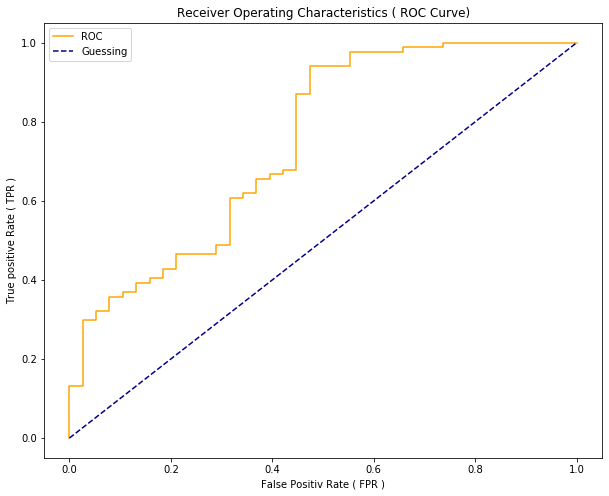

AUC Score : 74.66%


In [85]:
FPR, TPR, Threshold = roc_curve(Y_Valid, Prediction_Probability)
AUC = roc_curve(Y_Valid, Prediction_Probability)

def Plot_ROC_Curve(FPR, TPR) :
    
    '''
    
    Plot the Receiver Operating Characteristics : ROC Curve
    
    Parameter 
    ---------
    
    FPR : False Positive Rate
    
    TPR : True Positive Rate
    
    '''
    
    plt.figure(figsize = (10, 8))
    
    # Plot ROC Curve
    plt.plot(FPR, TPR, color = 'orange', label = 'ROC')
    
    # Plot Line with No Predictive Power (Baseline)
    plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--', label = 'Guessing')
    
    # Customize the Plot 
    plt.title('Receiver Operating Characteristics ( ROC Curve)')
    plt.xlabel('False Positiv Rate ( FPR )')
    plt.ylabel('True positive Rate ( TPR )')
    plt.legend()
    plt.show()

Plot_ROC_Curve(FPR, TPR)
print(f'AUC Score : {roc_auc_score(Y_Valid, Prediction_Probability)*100:.2f}%')

**How Does Perfect ROC Curve looks ?**

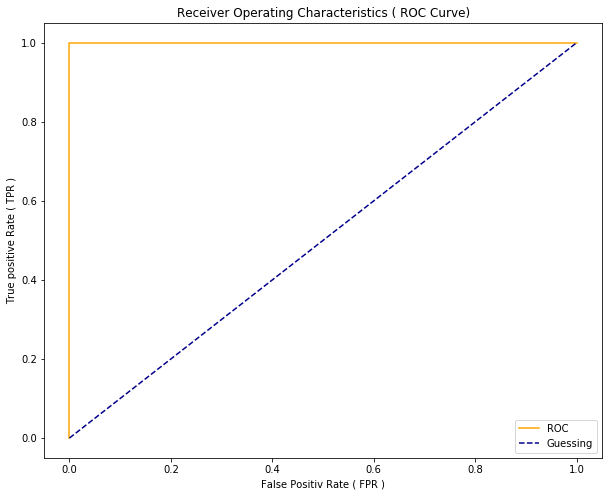

Perfect AUC Score : 100.00%


In [86]:
FPR, TPR, Threshold = roc_curve(Y_Valid, Y_Valid)
Plot_ROC_Curve(FPR, TPR)
print(f'Perfect AUC Score : {roc_auc_score(Y_Valid, Y_Valid)*100:.2f}%')

**Even after Applying Stratified K Fold Cross Validation the Improvement in the Accuracy was nots so Satisfying.**
***
### Feature Engineering :

**Based on Domain Knowledge New Feature might Affect the Target Variable**

1. **Total Income : Applicant Income + Coapplicant Imcome (If Sum of both the Income is High, Chance of Loan Approval will Increase.)**

2. **Equated Monthly Installments (EMI) : Monthly Amount to be Paid by the Applicant to Repay the Loan, Applicant with High EMI might Find it Difficult to Pay the Loan.**

3. **Balance Income : Income Left after EMI has been Paid, If the Balance Income is High it Increases the Chance of Applicant will Repay the Loan, which also Increases the Chance of Loan Approvals.**
***
**Creating a New Feature : Total Income = Applicant Income + Coapplicant Income.**

In [87]:
Train['Total_Income'] = Train['ApplicantIncome'] + Train['CoapplicantIncome']

Test['Total_Income'] = Train['ApplicantIncome'] + Train['CoapplicantIncome']

In [88]:
Train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Total_Income
0,5849,0.0,128.0,360.0,1.0,1,1,0,1,0,0,0,0,0,1,5849.0
1,4583,1508.0,128.0,360.0,1.0,0,1,1,0,1,0,0,0,0,0,6091.0
2,3000,0.0,66.0,360.0,1.0,1,1,1,1,0,0,0,1,0,1,3000.0
3,2583,2358.0,120.0,360.0,1.0,1,1,1,1,0,0,1,0,0,1,4941.0
4,6000,0.0,141.0,360.0,1.0,1,1,0,1,0,0,0,0,0,1,6000.0


**Checking the Distribution of Total Income :**

**Before the Transformation**

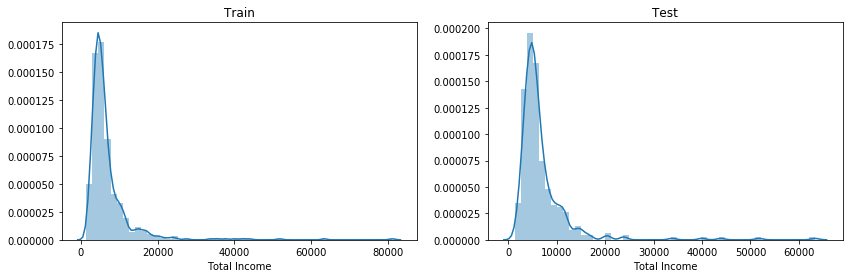

In [89]:
Fig = plt.figure(figsize = (14,4))
Ax1 = plt.subplot(121)
sns.distplot(Train['Total_Income'])
Ax1.set_title('Train')
plt.xlabel('Total Income')

Ax1 = plt.subplot(122)
sns.distplot(Test['Total_Income'])
Ax1.set_title('Test')
plt.xlabel('Total Income');

**Data is on the Left Side, Long Tail is on Right, Right Skewed / Positive Skewed**

**Improving the Distribution of Data by Log Transformation.**

In [90]:
Train['Log_Income'] = np.log(Train['Total_Income'])

Test['Log_Income'] = np.log(Test['Total_Income'])

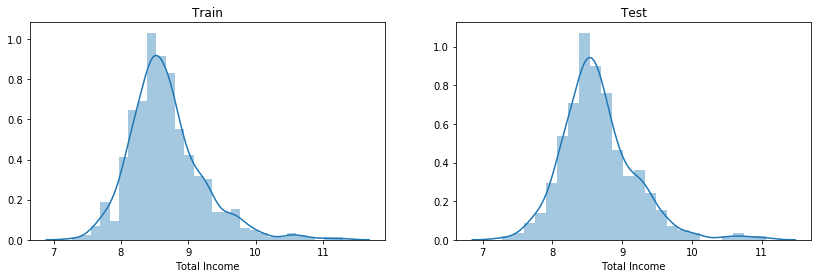

In [91]:
Fig = plt.figure(figsize = (14,4))
Ax1 = plt.subplot(121)
sns.distplot(Train['Log_Income'])
Ax1.set_title('Train')
plt.xlabel('Total Income')

Ax1 = plt.subplot(122)
sns.distplot(Test['Log_Income'])
Ax1.set_title('Test')
plt.xlabel('Total Income');

**Now the Distribution looks much Closer to Normal Distribution**

***

**Calculating and Creating a New Feature EMI.**

In [92]:
Train['EMI'] = Train['LoanAmount'] / Train['Loan_Amount_Term']

Test['EMI'] = Test['LoanAmount'] / Test['Loan_Amount_Term']

**EMI is a Continuous Numerical Variable, Checking its Distribution.**

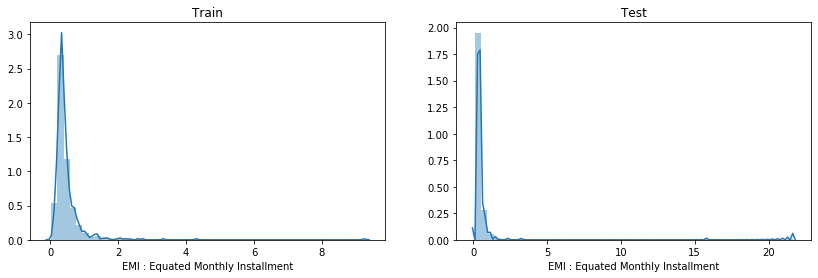

In [93]:
Fig = plt.figure(figsize = (14,4))

Ax1 = plt.subplot(121)
sns.distplot(Train['EMI'])
Ax1.set_title('Train')
plt.xlabel(f'EMI : Equated Monthly Installment')

Ax1 = plt.subplot(122)
sns.distplot(Test['EMI'])
Ax1.set_title('Test')
plt.xlabel(f'EMI : Equated Monthly Installment');

**Creating and Calculating Balance Income Feature.**

In [94]:
Train['Balance_Income'] = Train['Total_Income'] - (Train['EMI'] * 1000) # Multiplying by 1000 to make Unit Same.

Test['Balance_Income'] = Test['Total_Income'] - (Test['EMI'] * 1000)

**Checking the Distribution of Balance Income.**

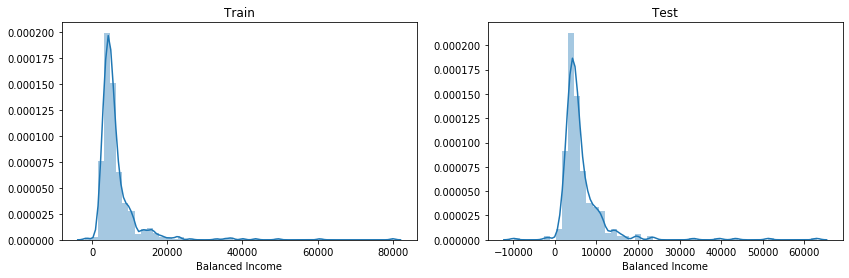

In [95]:
Fig = plt.figure(figsize = (14,4))

Ax1 = plt.subplot(121)
sns.distplot(Train['Balance_Income'])
Ax1.set_title('Train')
plt.xlabel('Balanced Income')

Ax1 = plt.subplot(122)
sns.distplot(Test['Balance_Income'])
Ax1.set_title('Test')
plt.xlabel('Balanced Income');

**Dropping the Features which were used to Create New Features.**

In [96]:
Train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis = 1, inplace = True)

Test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis = 'columns', inplace = True)

In [97]:
Train.head()

,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Log_Income,EMI,Balance_Income
0,1.0,1,1,0,1,0,0,0,0,0,1,5849.0,8.674026,0.355556,5493.444444
1,1.0,0,1,1,0,1,0,0,0,0,0,6091.0,8.714568,0.355556,5735.444444
2,1.0,1,1,1,1,0,0,0,1,0,1,3000.0,8.006368,0.183333,2816.666667
3,1.0,1,1,1,1,0,0,1,0,0,1,4941.0,8.505323,0.333333,4607.666667
4,1.0,1,1,0,1,0,0,0,0,0,1,6000.0,8.699515,0.391667,5608.333333


**After Feature Engineering, again Try Logistic Regression and Stratified K Fold Cross Validation**
***
**Splitting Data into Independent Features and Dependent Feature.**

In [98]:
X = Train.drop('Loan_Status', axis = 'columns')

Y = Train['Loan_Status']

**Applying Logistic Regression with Stratified K Fold Cross Validation.**

**Shuffle Each Stratification before Splitting.**

In [99]:
Mean_Accuracy = []

i = 1

KFS = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)

for Train_Data, Valid_Data in KFS.split(X, Y) :
    
    print(f'\n{i} of 5 Folds :')
    
    X_Train, X_Valid = X.loc[Train_Data], X.loc[Valid_Data]
    
    Y_Train, Y_Valid = Y.loc[Train_Data], Y.loc[Valid_Data]
    
    Model = LogisticRegression(random_state = 1)
    
    Model.fit(X_Train, Y_Train)
    
    Y_Prediction = Model.predict(X_Valid)
    
    Accuracy_Score = accuracy_score(Y_Valid, Y_Prediction)
    
    Mean_Accuracy.append(Accuracy_Score)
    
    print(f'Accuracy Score : {Accuracy_Score*100:.2f}%')
    
    i +=1
    
print(f'\nMean Accuracy of 5 Fold Cross Validation : {(sum(Mean_Accuracy)/len(Mean_Accuracy))*100:.2f}%')


1 of 5 Folds :
Accuracy Score : 81.30%

2 of 5 Folds :
Accuracy Score : 80.49%

3 of 5 Folds :
Accuracy Score : 66.67%

4 of 5 Folds :
Accuracy Score : 68.29%

5 of 5 Folds :
Accuracy Score : 76.23%

Mean Accuracy of 5 Fold Cross Validation : 74.60%


**It is Visible that Feature Engineering has not Improved the Model, Accuracy is not as Expected**

***

### Decision Tree

**Supervised Machine Learning Algorithm, mostly used in Classification Problems.**

**Import Decision Tree Classifier**

In [100]:
from sklearn.tree import DecisionTreeClassifier

**Applying Decision Tree Classifier with Stratified K Fold Cross Validation.**

**Shuffle each Stratification before Splitting.**

In [101]:
Mean_Accuracy = []

i = 1

KFS = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)

for Train_Data, Valid_Data in KFS.split(X, Y) :
    
    print(f'\n{i} of 5 K Folds')
    
    X_Train, X_Valid = X.loc[Train_Data], X.loc[Valid_Data]
    
    Y_Train, Y_Valid = Y.loc[Train_Data], Y.loc[Valid_Data]
    
    Model = DecisionTreeClassifier(random_state = 1)
    
    Model.fit(X_Train, Y_Train)
    
    Y_Prediction = Model.predict(X_Valid)
    
    Accuracy_Score = accuracy_score(Y_Valid, Y_Prediction)
    
    Mean_Accuracy.append(Accuracy_Score)
    
    print(f'Accuracy Score : {Accuracy_Score*100:.2f}%')
    
    i += 1
    
print(f'\nMean Validation Accuracy : {(sum(Mean_Accuracy)/len(Mean_Accuracy))*100:.2f}%')


1 of 5 K Folds
Accuracy Score : 67.48%

2 of 5 K Folds
Accuracy Score : 68.29%

3 of 5 K Folds
Accuracy Score : 75.61%

4 of 5 K Folds
Accuracy Score : 71.54%

5 of 5 K Folds
Accuracy Score : 67.21%

Mean Validation Accuracy : 70.03%


**Even by Using Decision Tree Algorithm the Accuracy is not Enough.**

***

### Random Forest 

**Tree Based Ensemble Algorithm and Try to Improve the Model by Improving the Accuracy.**

- **A Tree Based Bootstrapping Algorithm where Weak Learners are Combined to make a Better Prediction Model.**

- **For Every Individual Learner, A Random Sample of Rows and a few Randomly choosen Variables are used to Build a Decision Tree Model.**

- **Final Prediction is the One with Majority.**

- **In Case of Regression, Final Prediction is Mean of all Predictions.**

**Important Parameters :**

1. **n_estimators : Bigger the Forest Better the Model, chance of Overfitting Reduces.**

2. **max_depth : Low Depth helps us to keep low Overfitting.**

**Import Random Forest Classifier**

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
Mean_Accuracy = []

i = 1

KFS = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)

for Train_Data, Valid_Data in KFS.split(X, Y) :
    
    print(f'\n{i} of 5 Folds')
    
    X_Train, X_Valid = X.loc[Train_Data], X.loc[Valid_Data]
    
    Y_Train, Y_Valid = Y.loc[Train_Data], Y.loc[Valid_Data]
    
    Model = RandomForestClassifier(random_state = 1, n_estimators = 10, max_depth = 10)
    
    Model.fit(X_Train, Y_Train)
    
    Y_Prediction = Model.predict(X_Valid)
    
    Accuracy_Score = accuracy_score(Y_Valid, Y_Prediction)
    
    Mean_Accuracy.append(Accuracy_Score)
    
    print(f'Accuracy Score : {Accuracy_Score*100:.2f}%')
    
    i += 1
    
print(f'\nMean Validation Accuracy : {(sum(Mean_Accuracy)/len(Mean_Accuracy))*100:.2f}%')


1 of 5 Folds
Accuracy Score : 82.93%

2 of 5 Folds
Accuracy Score : 77.24%

3 of 5 Folds
Accuracy Score : 78.05%

4 of 5 Folds
Accuracy Score : 78.05%

5 of 5 Folds
Accuracy Score : 77.05%

Mean Validation Accuracy : 78.66%


**Accuracy Obtained using Random Forest Classifier is Far more Better from All the Above Model's Accuracy.**

**Prediction on Test Data**

In [104]:
Test_Prediction = Model.predict(Test)

**Predictions**

In [105]:
print(Test_Prediction[:25])

[1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1]


**Importing Submission File which we have to Send for Solutionn Checking.**

In [106]:
Submission = pd.read_csv("Sample Submission.csv")

Loan = pd.read_csv("Loan Approval Test.csv")

**We want Load_ID Column from Test Data Set**

In [107]:
Submission['Loan_ID'] = Loan['Loan_ID']

Submission['Loan_Status'] = Test_Prediction

In [108]:
print(Submission.head())

    Loan_ID  Loan_Status
0  LP001015            1
1  LP001022            1
2  LP001031            1
3  LP001035            1
4  LP001051            1


**Prediction is needed in Y and N**

In [109]:
Submission['Loan_Status'] = np.where(Submission['Loan_Status'] == 1, 'Y', 'N')

In [110]:
print(Submission.head())

    Loan_ID Loan_Status
0  LP001015           Y
1  LP001022           Y
2  LP001031           Y
3  LP001035           Y
4  LP001051           Y


**Submit to Check Accuracy on Leaderboard.**

In [111]:
Submission.to_csv('RandomForest.csv', index = False)

**Score for My Submission is still Showing 78%**

### Grid Search Cross Validation

**Improving the Accuracy by Tunning Hyperparameters for Model.**

**Using Grid Search Cross Validation for Better Optimized Values of Hyper Parameters.**

**Grid Search helps to Select Best Family of Hyper Paramters, Parameterized by Grid of Parameters.**

**Grid Search Cross Validation is an Exhaustive Search over Specified Parameter Values for an Estimator**

#### Important Methods of Grid Search Cross Validation :

1.**fit() : Train Model using Training Data Set**

2.**score() : Accuracy of Model**

3.**predict() : Make Prediction on Test Data**

4.**predict_proba() : Probability of Prediction on Test Set** 

5.**transform() : Transform the Data**

#### Parameters to be Tuned 

1.**n_estimators : Number of Trees**

2.**max_depth : Maximum Depth of Tree**

***

**Import Library**

In [112]:
from sklearn.model_selection import GridSearchCV

**n_estimators : Start from 1 and End at 199 with Step Count of 20**

**max_depth : Start from 1 and End at 20 with Step Count of 2**

In [113]:
Parameter_Grid = {'n_estimators' : list(range(1,200,20)), 'max_depth' : list(range(1,20,2))}

**Performing 5 Fold Cross Validation**

In [114]:
Grid_Search = GridSearchCV(RandomForestClassifier(random_state = 1), Parameter_Grid)

In [115]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

**Train the Model using Train Data Set**

In [116]:
Grid_Search.fit(X_Train, Y_Train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                

**Best Estimators found**

In [117]:
print(Grid_Search.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=21,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


**Creating Model using Best Optimized Value**

In [118]:
Mean_Accuracy = []

i = 1

KFS = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)

for Train_Data, Valid_Data in KFS.split(X, Y) :
    
    print(f'\n{i} of 5 Folds')
    
    X_Train, X_Valid = X.loc[Train_Data], X.loc[Valid_Data]
    
    Y_Train, Y_Valid = Y.loc[Train_Data], Y.loc[Valid_Data]
    
    Model = RandomForestClassifier(random_state = 1, max_depth = 3, n_estimators = 21)
    
    Model.fit(X_Train, Y_Train)
    
    Y_Prediction = Model.predict(X_Valid)
    
    Accuracy_Score = accuracy_score(Y_Valid, Y_Prediction)
    
    Mean_Accuracy.append(Accuracy_Score)
    
    print(f'Accuracy Score : {Accuracy_Score*100:.2f}%')
    
    i += 1
    
print(f'\nMean Validation Accuracy : {(sum(Mean_Accuracy)/len(Mean_Accuracy))*100:.2f}%')


1 of 5 Folds
Accuracy Score : 82.93%

2 of 5 Folds
Accuracy Score : 85.37%

3 of 5 Folds
Accuracy Score : 78.05%

4 of 5 Folds
Accuracy Score : 79.67%

5 of 5 Folds
Accuracy Score : 78.69%

Mean Validation Accuracy : 80.94%


### Feature Importance

In [119]:
Important_Features = pd.Series(Model.feature_importances_, index = X.columns)

**Visualizing the Feature Importance**

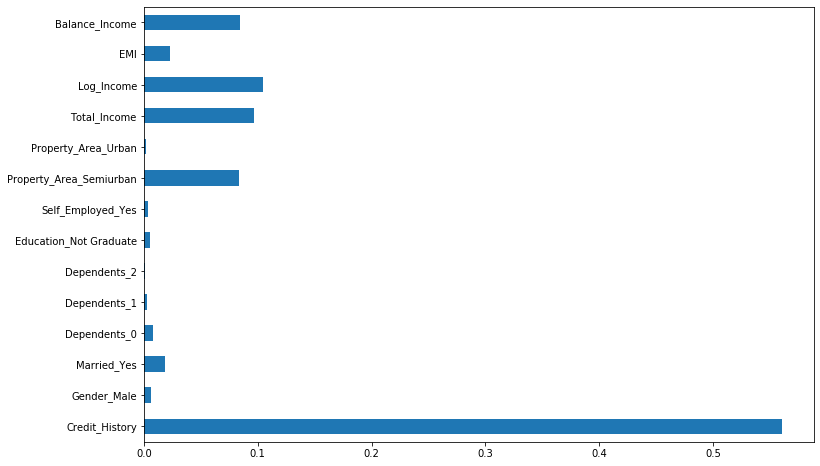

In [120]:
Important_Features.plot(kind = 'barh', figsize = (12, 8));

**Credit History is the Most Important Feature followed by Log Income, Total Income and Balance Income and Property Area in Semiurban.**

***

###  XGBOOST

**XGBOOST works with only Numerical Data**

**Parameters**

1. **n_estimators : Number of Trees for the Model.**

2. **max_depth : Maximum Depth of the Tree.**

***

**Import Library**

In [121]:
from xgboost import XGBClassifier

In [122]:
Mean_Accuracy = []

i = 1

KFS = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)

for Train_Data, Valid_Data in KFS.split(X, Y) :
    
    print(f'\n{i} of 5 Folds')
    
    X_Train, X_Valid = X.loc[Train_Data], X.loc[Valid_Data]
    
    Y_Train, Y_Valid = Y.loc[Train_Data], Y.loc[Valid_Data]
    
    Model = XGBClassifier(random_state = 1, n_estimators = 50, max_depth = 4)
    
    Model.fit(X_Train, Y_Train)
    
    Y_Prediction = Model.predict(X_Valid)
    
    Accuracy_Score = accuracy_score(Y_Valid, Y_Prediction)
    
    Mean_Accuracy.append(Accuracy_Score)
    
    print(f'Accuracy Score : {Accuracy_Score*100:.2f}%')
    
    i += 1
    
print(f'\nMean Validation Accuracy : {(sum(Mean_Accuracy)/len(Mean_Accuracy))*100:.2f}%')


1 of 5 Folds
Accuracy Score : 81.30%

2 of 5 Folds
Accuracy Score : 81.30%

3 of 5 Folds
Accuracy Score : 78.86%

4 of 5 Folds
Accuracy Score : 79.67%

5 of 5 Folds
Accuracy Score : 77.87%

Mean Validation Accuracy : 79.80%


**Improving the Accuracy by Tuning Hyperparameters**

**Using Grid Search Cross Validation to get the Optimized Values of Hyperparameters.**

In [123]:
Parameter_Grid = {'max_depth' : list(range(1, 20, 2)), 'n_estimators' : list(range(1, 200, 20))}

**Apply Grid Search Cross Validation on XGBOOST Classifier.**

In [124]:
Grid_Search = GridSearchCV(XGBClassifier(random_state = 1), Parameter_Grid)

**Split the Data into Train Set and Validation Set**

In [125]:
X_Train, X_Valid, Y_Train, Y_Valid = train_test_split(X, Y, test_size = 0.3, random_state = 1)

**Train the Model and Find Patterns in Training Data**

In [126]:
print(Grid_Search.fit(X_Train, Y_Train))

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=1, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                  

**Best Estimator Obtained**

In [127]:
print(Grid_Search.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=1, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [128]:
Mean_Accuracy = []

i = 1

KFS = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)

for Train_Data, Valid_Data in KFS.split(X,Y) :
    
    print(f'\n{i} of 5 Folds :')
    
    X_Train, X_Valid = X.loc[Train_Data], X.loc[Valid_Data]
    
    Y_Train, Y_Valid = Y.loc[Train_Data], Y.loc[Valid_Data]
    
    Model = XGBClassifier(random_state = 1, n_estimators = 1, max_depth = 1)
    
    Model.fit(X_Train, Y_Train)
    
    Y_Prediction = Model.predict(X_Valid)
    
    Accuracy_Score = accuracy_score(Y_Valid, Y_Prediction)
    
    Mean_Accuracy.append(Accuracy_Score)
    
    print(f'Accuracy Score : {Accuracy_Score*100:.2f}%')
    
    i += 1
    
print(f'\nMean Validation Score : {(sum(Mean_Accuracy)/len(Mean_Accuracy))*100:.2f}%')


1 of 5 Folds :
Accuracy Score : 81.30%

2 of 5 Folds :
Accuracy Score : 83.74%

3 of 5 Folds :
Accuracy Score : 79.67%

4 of 5 Folds :
Accuracy Score : 80.49%

5 of 5 Folds :
Accuracy Score : 79.51%

Mean Validation Score : 80.94%


**Test Prediction**

In [129]:
Test_Prediction = Model.predict(Test)

**Prediction Probability**

In [130]:
Test_Probability = Model.predict_proba(Test)[:,1]

**Importing Submission File which we have to Send for Solution Checking**

In [131]:
Submission = pd.read_csv('Sample Submission.csv')

Loan = pd.read_csv('Loan Approval Test.csv')

**We want to Load ID Column from Test Data**

In [132]:
Submission['Loan_ID'] = Loan['Loan_ID']

Submission['Loan_Status'] = Test_Prediction

In [133]:
print(Submission.head())

    Loan_ID  Loan_Status
0  LP001015            1
1  LP001022            1
2  LP001031            1
3  LP001035            1
4  LP001051            1


**Replacing 0 and 1 with N and Y**

In [134]:
Submission['Loan_Status'] = np.where(Submission['Loan_Status'] == 1, 'Y', 'N')

In [135]:
print(Submission.head())

    Loan_ID Loan_Status
0  LP001015           Y
1  LP001022           Y
2  LP001031           Y
3  LP001035           Y
4  LP001051           Y


**Saving Data in CSV Format**

In [136]:
Submission.to_csv('XGBOOST.csv', index = False)

# <a name="CON">Conclusion</a>
    
**Suggestions for Imrprovement :**
    
1. **Add More Meaningful Features.**

2. **Different Models with Different Subsets of Features.**

3. **Visualize Independent vs Dependent Features to Find more Meaningful Patterns.**

4. **Apply Ensemble Techniques (Combinations of Optimized and Tuned Hyperparameters)**

5. **This Project was Good for Learning Point of View**

***